<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-&amp;-Functions" data-toc-modified-id="Import-Libraries-&amp;-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries &amp; Functions</a></span></li><li><span><a href="#Read-the-Files" data-toc-modified-id="Read-the-Files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the Files</a></span><ul class="toc-item"><li><span><a href="#Mapping-Ticker-Data" data-toc-modified-id="Mapping-Ticker-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mapping Ticker Data</a></span></li><li><span><a href="#Market-Psych" data-toc-modified-id="Market-Psych-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Market Psych</a></span></li><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Training Data</a></span></li></ul></li><li><span><a href="#Standard-Scaller" data-toc-modified-id="Standard-Scaller-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Standard Scaller</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li><li><span><a href="#Regression-Model" data-toc-modified-id="Regression-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regression Model</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#XGBoost-Regressor" data-toc-modified-id="XGBoost-Regressor-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>XGBoost Regressor</a></span><ul class="toc-item"><li><span><a href="#GridSearch" data-toc-modified-id="GridSearch-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>GridSearch</a></span></li><li><span><a href="#Fit-to-Whole-Training-Data" data-toc-modified-id="Fit-to-Whole-Training-Data-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Fit to Whole Training Data</a></span></li><li><span><a href="#Performance-or-Classification" data-toc-modified-id="Performance-or-Classification-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Performance or Classification</a></span></li></ul></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Support-Vector-Regressor" data-toc-modified-id="Support-Vector-Regressor-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Support Vector Regressor</a></span></li><li><span><a href="#Ensemble" data-toc-modified-id="Ensemble-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Ensemble</a></span></li></ul></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test Data</a></span></li><li><span><a href="#Standard-Scaller" data-toc-modified-id="Standard-Scaller-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Standard Scaller</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li><li><span><a href="#Archive-Code" data-toc-modified-id="Archive-Code-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Archive Code</a></span></li></ul></div>

# Import Libraries & Functions

In [157]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import pandas as pd

In [158]:
def grade_calculation(score):
    score = score / 100
    
    if score <= 0.250000:
        val = 'D'
    elif score <= 0.500000: 
        val = 'C'
    elif score <= 0.750000: 
        val = 'B'
    elif score > 0.75: 
        val = 'A'

    return val

# Read the Files

## Mapping Ticker Data

In [159]:
fortune100 = pd.read_csv('../data/fortune100.csv')
dax40 = pd.read_csv('../data/DAX40.csv')
ftse100 = pd.read_csv('../data/FTSE100.csv')

fortune100 = fortune100[['Symbol','RIC']]
fortune100 = fortune100.rename(columns={'Symbol':'ticker_'})

dax40 = dax40[['Ticker','RIC']]
dax40 = dax40.rename(columns={'Ticker':'ticker_'})

ftse100 = ftse100[['Ticker','Query']]
ftse100 = ftse100.rename(columns={'Query':'RIC', 'Ticker':'ticker_'})

In [160]:
compile_indexes_df = pd.concat([fortune100, dax40, ftse100])

## Market Psych

In [165]:
MarketPsych_df = pd.read_csv('/Users/yogi/Desktop/MPsych.csv')
MarketPsych_df = MarketPsych_df.rename(columns={'Y':'year'})

In [166]:
MarketPsych_df = MarketPsych_df.iloc[:, 1:]
MarketPsych_df = pd.concat([MarketPsych_df[['ticker_', 'year']] , MarketPsych_df.drop(['ticker_','year'], axis=1)], axis=1)

In [167]:
MarketPsych_df.head()

,ticker_,year,buzz_News,buzz_News_Headline,buzz_News_Social,buzz_Social,innovation_News,innovation_News_Headline,innovation_News_Social,innovation_Social,...,layoffs_News_Social,layoffs_Social,managementTrust_News,managementTrust_News_Headline,managementTrust_News_Social,managementTrust_Social,mentions_News,mentions_News_Headline,mentions_News_Social,mentions_Social
0,LAND,2022,1498.70,63.0,1879.70,381.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,620.0,47.0,982.0,362.0
1,LAND,2023,934.00,13.0,979.00,45.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.176471,0.000000,0.200000,0.200000,469.0,27.0,483.0,14.0
2,BLND,2022,15537.50,705.5,20170.60,4633.1,0.090909,0.142857,0.125000,0.142857,...,0.086957,0.095238,0.090909,0.000000,0.047619,0.041667,3712.0,317.0,5664.0,1952.0
3,BLND,2023,7463.60,236.5,8992.50,1528.9,0.333333,0.000000,0.072727,0.062500,...,0.013158,0.019231,0.047059,0.000000,0.042105,0.000000,1909.0,120.0,2382.0,473.0
4,HL.,2022,72534.15,1474.0,85237.55,12703.4,0.025316,0.000000,0.025000,0.080000,...,0.036851,0.000000,0.117073,0.066667,0.081911,0.060606,12377.0,583.0,16391.0,4014.0


## Training Data

In [168]:
train_1 = pd.read_csv('../data/ML_Data/train_footsie_contains.csv')
train_2 = pd.read_csv('../data/ML_Data/train_fortune100_contains.csv')
train_3 = pd.read_csv('../data/ML_Data/train_DAX_contains.csv')

train_df = pd.concat([train_1,train_2,train_3], axis=0)
train_df = train_df.rename(columns={'firm':'RIC'})

In [169]:
train_df = pd.merge(train_df, compile_indexes_df, how='left', on = 'RIC')

In [170]:
train_df = pd.concat([train_df[['RIC', 'year' ,'ticker_']], train_df.drop(['RIC', 'year' ,'ticker_'], axis=1)], axis=1)

In [171]:
train_df.head()

,RIC,year,ticker_,0,1,2,3,4,5,6,...,760,761,762,763,764,765,766,767,ESG Controversies Score,ESG Controversies Score Grade
0,AAF.L,2022,AAF,-0.316090,0.325633,0.492556,-0.050070,0.381271,0.446845,-0.207054,...,0.180643,0.616740,-0.715521,0.880630,-0.490878,-0.111745,0.736818,0.420092,100.000000,A+
1,ABDN.L,2022,ABDN,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,...,0.812860,0.249883,-0.261393,0.220430,-0.307368,-0.685380,-0.035406,0.278564,100.000000,A+
2,ABDN.L,2022,ABDN,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,...,0.812860,0.249883,-0.261393,0.220430,-0.307368,-0.685380,-0.035406,0.278564,100.000000,A+
3,AHT.L,2022,AHT,-0.808410,0.125399,0.427910,0.202350,0.725803,0.359200,0.196529,...,0.937636,0.762159,-0.738225,0.972579,-0.804485,-0.530617,0.665348,0.749797,74.528302,B+
4,ANTO.L,2022,ANTO,-0.184318,-0.158951,-0.472866,0.285990,0.295325,-0.150287,-0.207242,...,0.642592,-0.064270,-0.249068,0.019297,0.019295,-0.622573,0.041856,-0.046189,100.000000,A+


In [172]:
train_completed_df = pd.merge(train_df, MarketPsych_df, how = 'left', on=['ticker_','year'])

In [173]:
train_completed_df = pd.concat([
    train_completed_df.drop(['ESG Controversies Score', 'ESG Controversies Score Grade'], axis=1), 
    train_completed_df[['ESG Controversies Score', 'ESG Controversies Score Grade']]], axis=1)

In [174]:
train_completed_df = train_completed_df[train_completed_df['managementTrust_News_Headline'].notnull()]
train_completed_df = train_completed_df.reset_index(drop=True)

In [175]:
np.unique(train_completed_df['ESG Controversies Score Grade'], return_counts=True)

(array(['A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'D', 'D+', 'D-'],
       dtype=object),
 array([49,  1,  1,  8,  5,  3,  3,  4,  1,  4]))

In [305]:
train_completed_df

,0,1,2,3,4,5,6,7,8,9,...,layoffs_Social,managementTrust_News,managementTrust_News_Headline,managementTrust_News_Social,managementTrust_Social,mentions_News,mentions_News_Headline,mentions_News_Social,mentions_Social,ESG Controversies Score
0,-0.316090,0.325633,0.492556,-0.050070,0.381271,0.446845,-0.207054,-0.637495,0.801130,-0.353742,...,0.000000,0.133333,0.000000,0.133333,0.133333,7286.0,648.0,7830.0,544.0,100.0
1,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,0.122388,-0.347592,-0.396832,...,0.022989,0.114286,0.000000,0.108108,0.101695,2841.0,372.0,4838.0,1997.0,100.0
2,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,0.122388,-0.347592,-0.396832,...,0.022989,0.114286,0.000000,0.108108,0.101695,2841.0,372.0,4838.0,1997.0,100.0
3,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,0.122388,-0.347592,-0.396832,...,0.022989,0.114286,0.000000,0.108108,0.101695,2841.0,372.0,4838.0,1997.0,100.0
4,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,0.122388,-0.347592,-0.396832,...,0.022989,0.114286,0.000000,0.108108,0.101695,2841.0,372.0,4838.0,1997.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,-0.268584,0.051497,0.007844,0.024613,0.223107,0.163451,-0.160058,-0.251668,0.219104,-0.172581,...,0.108108,0.230769,0.003937,0.133333,0.187500,6529.0,722.0,9391.0,2862.0,100.0
75,-0.222348,0.097316,0.050808,-0.007150,0.325427,0.186515,-0.215515,-0.279082,0.286403,-0.073388,...,0.003571,0.210526,0.043478,0.133333,0.021505,10350.0,747.0,13134.0,2784.0,100.0
76,-0.464123,0.142668,0.312886,0.165592,0.470431,0.262848,-0.086061,-0.414470,0.518723,-0.170756,...,0.000000,0.107143,0.049505,0.107143,0.071429,12225.0,687.0,15759.0,3534.0,100.0
77,0.301456,0.452857,0.400814,-0.373105,-0.373304,0.404690,-0.543124,-0.520576,0.470350,0.465419,...,0.057143,0.075000,0.260870,0.073171,0.000000,5657.0,694.0,6905.0,1248.0,100.0


In [176]:
def grade_calculation(score):
    score = score / 100
    
    if score <= 0.250000:
        val = 'D'
    elif score <= 0.500000: 
        val = 'C'
    elif score <= 0.750000: 
        val = 'B'
    elif score > 0.75: 
        val = 'A'

    return val

In [177]:
y_simple = train_completed_df['ESG Controversies Score'].apply(lambda x: grade_calculation(x))

In [178]:
train_completed_df = train_completed_df.drop(['RIC','year', 'ticker_','ESG Controversies Score Grade','ESG Controversies Score Grade'], axis=1).reset_index(drop=True)

In [179]:
y = train_completed_df.iloc[:,-1]
X = train_completed_df.iloc[:,:-1]

# Standard Scaller

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
stdscaller = StandardScaler()

X_std_df = stdscaller.fit_transform(X)
X_std_df = pd.DataFrame(X_std_df)

# Principal Component Analysis

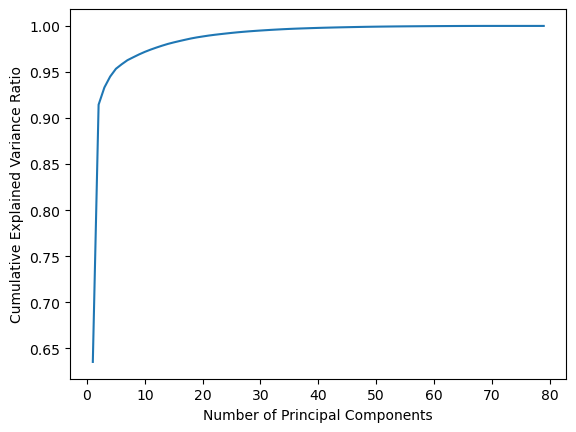

In [240]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to Xtrn_mn
pca = PCA()

pca.fit(X_std_df)

# Calculate explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_exp_var_ratio = np.cumsum(explained_var_ratio)

# Plot the graph
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_exp_var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [241]:
#(3) Your code goes here

# Calculate the cumulative explained variance ratio
cumulative_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of principal components required to explain a certain percentage of the total variance
for percent in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    num_components = np.argmax(cumulative_explained_var_ratio >= percent) + 1
    print(f"Minimum number of principal components to explain {percent*100}% of variance: {num_components}")

Minimum number of principal components to explain 50.0% of variance: 1
Minimum number of principal components to explain 60.0% of variance: 1
Minimum number of principal components to explain 70.0% of variance: 2
Minimum number of principal components to explain 80.0% of variance: 2
Minimum number of principal components to explain 90.0% of variance: 2
Minimum number of principal components to explain 95.0% of variance: 5
Minimum number of principal components to explain 99.0% of variance: 22


In [242]:
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_std_df)

In [185]:
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.15, random_state=42)

In [186]:
import seaborn as sns

In [187]:
np.unique(y_simple, return_counts=True)

(array(['A', 'B', 'C', 'D'], dtype=object), array([50, 14,  6,  9]))

In [188]:
cc = []
for i in y_simple:
    
    if i == 'A':
        cc.append(1)
    elif i == 'B':
        cc.append(2)
    elif i == 'C':
        cc.append(3)
    elif i == 'D':
        cc.append(4)

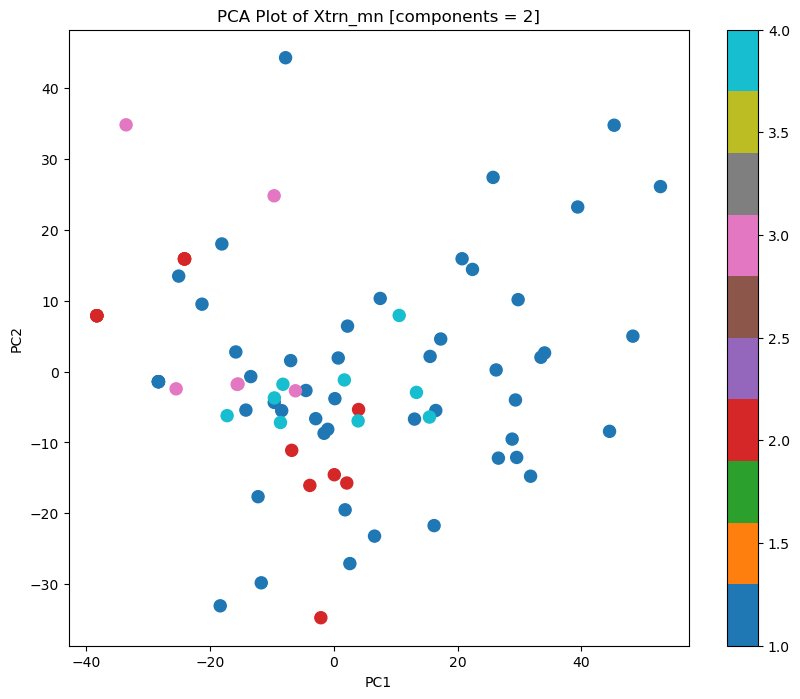

In [189]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to two dimensions
pca = PCA(n_components=2, random_state=0)
Xtrn_pca = pca.fit_transform(X_std_df)

# Plot the dimensionality-reduced data on the two-dimensional plane
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(Xtrn_pca[:, 0], Xtrn_pca[:, 1], c=cc, cmap="tab10", s=75)
plt.colorbar(scatter, ax=ax)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA Plot of Xtrn_mn [components = 2]")
plt.show()

# Regression Model

## Ridge Regression

In [190]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge_model = Ridge()

param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization parameter alpha
    'fit_intercept': [True, False],  # Whether to calculate the intercept for the model
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Solver for computing the weights
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/Users/yogi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yogi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yogi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yogi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yogi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [191]:
# def caps(x):
    
#     return min(x, 100)

In [192]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
# y_train_pred = [cap(val) for val in y_train_pred]

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'alpha': 10.0, 'fit_intercept': True, 'solver': 'saga'}
Root Mean Squared Error: 22.24992701273162


In [193]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
y_pred = [caps(val) for val in y_pred]
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'alpha': 10.0, 'fit_intercept': True, 'solver': 'saga'}
Root Mean Squared Error: 28.11268892668706


## XGBoost Regressor

In [194]:
# Create an XGBoostRegressor model
XGB_model = XGBRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of each tree
}

### GridSearch

In [195]:
grid_search = GridSearchCV(XGB_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
# y_train_pred = [caps(val) for val in y_train_pred]
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Root Mean Squared Error: 1.091083675979251


In [196]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
# y_pred = [caps(val) for val in y_pred]
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Root Mean Squared Error: 24.7136750555709


In [197]:
grid_search = GridSearchCV(XGB_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Root Mean Squared Error: 24.7136750555709


### Fit to Whole Training Data

In [198]:
XGB_model = XGBRegressor(**grid_search.best_params_)
XGB_model.fit(X_train, y_train)

y_pred = XGB_model.predict(X_val)

In [199]:
y_pred_grade = [grade_calculation(sc) for sc in y_pred]
y_val_grade = [grade_calculation(sc) for sc in y_val]

### Performance or Classification

In [200]:
print(accuracy_score(y_pred_grade, y_val_grade))
print(y_pred_grade)
print(y_val_grade)

0.75
['B', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'A']
['A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A']


## Random Forest Regressor

In [201]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 3, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

In [202]:
grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Root Mean Squared Error: 11.295182655869862


In [203]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Root Mean Squared Error: 26.364363132415207


In [73]:
grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Root Mean Squared Error: 30.763717619916108


In [204]:
rf_model = RandomForestRegressor(**grid_search.best_params_)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

In [205]:
y_pred_grade = [grade_calculation(sc) for sc in y_pred]
y_val_grade = [grade_calculation(sc) for sc in y_val]

In [206]:
print(accuracy_score(y_pred_grade, y_val_grade))
print(y_pred_grade)
print(y_val_grade)

0.8333333333333334
['B', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A']
['A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A']


## Support Vector Regressor

In [207]:
# Support Vector Regressor
svr_model = SVR()

# Define the parameter grid for grid search
svr_param_grid = {
    'C': [0.1, 1, 10, 100],  # Penalty parameter C
    'epsilon': [0.01, 0.1, 0.5, 1.0],  # Epsilon parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly' kernels
}

In [208]:
grid_search = GridSearchCV(svr_model, svr_param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error Training:", rmse)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error Test:", rmse)

Best Hyperparameters: {'C': 100, 'epsilon': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Root Mean Squared Error Training: 1.0000030079920814
Best Hyperparameters: {'C': 100, 'epsilon': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Root Mean Squared Error Test: 28.90794294698123


In [79]:
grid_search = GridSearchCV(svr_model, svr_param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'C': 100, 'epsilon': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Root Mean Squared Error: 34.06233962438234


In [209]:
svr_model = SVR(**grid_search.best_params_)
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_val)

In [210]:
y_pred_grade = [grade_calculation(sc) for sc in y_pred]
y_val_grade = [grade_calculation(sc) for sc in y_val]

In [211]:
print(accuracy_score(y_pred_grade, y_val_grade))
print(y_pred_grade)
print(y_val_grade)

0.8333333333333334
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B']
['A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A']


## Ensemble

In [212]:
from sklearn.ensemble import VotingRegressor

In [213]:
# Define the individual regression models
model1 = Ridge(**{'alpha': 10.0, 'fit_intercept': True, 'solver': 'saga'})
model2 = RandomForestRegressor(**{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200})
model3 = SVR(**{'C': 100, 'epsilon': 1.0, 'gamma': 'scale', 'kernel': 'rbf'})

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('ridge', model1), ('RFR', model2), ('svr', model3)])

In [214]:
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('ridge', Ridge(alpha=10.0, solver='saga')),
                            ('RFR',
                             RandomForestRegressor(max_features='sqrt',
                                                   min_samples_leaf=2,
                                                   n_estimators=200)),
                            ('svr', SVR(C=100, epsilon=1.0))])

In [215]:
y_train_pred = ensemble_model.predict(X_train)
# y_train_pred = [caps(val) for val in y_train_pred]
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

In [216]:
# evaluation metrics
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 18.38214343321353


In [217]:
# Evaluate the best model on the test set
y_pred = ensemble_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'C': 100, 'epsilon': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Root Mean Squared Error: 23.397557407170666


# Test Data

In [259]:
test_1 = pd.read_csv('../data/ML_Data/test_footsie_contains.csv')
test_2 = pd.read_csv('../data/ML_Data/test_fortune100_contains.csv')
test_3 = pd.read_csv('../data/ML_Data/test_DAX_contains.csv')

test_df = pd.concat([test_1,test_2,test_3], axis=0)
test_df = test_df.rename(columns={'firm':'RIC'})

In [260]:
test_df = pd.merge(test_df, compile_indexes_df, how='left', on = 'RIC')

In [261]:
test_df = pd.concat([test_df[['RIC', 'year' ,'ticker_']], test_df.drop(['RIC', 'year' ,'ticker_'], axis=1)], axis=1)

In [262]:
# test_completed_df = test_df.drop(['RIC','year', 'ticker_','ESG Controversies Score Grade','ESG Controversies Score Grade'], axis=1).reset_index(drop=True)

In [263]:
train_df[train_df['year'] == 2022]

,RIC,year,ticker_,0,1,2,3,4,5,6,...,760,761,762,763,764,765,766,767,ESG Controversies Score,ESG Controversies Score Grade
0,AAF.L,2022,AAF,-0.316090,0.325633,0.492556,-0.050070,0.381271,0.446845,-0.207054,...,0.180643,0.616740,-0.715521,0.880630,-0.490878,-0.111745,0.736818,0.420092,100.000000,A+
1,ABDN.L,2022,ABDN,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,...,0.812860,0.249883,-0.261393,0.220430,-0.307368,-0.685380,-0.035406,0.278564,100.000000,A+
2,ABDN.L,2022,ABDN,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,...,0.812860,0.249883,-0.261393,0.220430,-0.307368,-0.685380,-0.035406,0.278564,100.000000,A+
3,AHT.L,2022,AHT,-0.808410,0.125399,0.427910,0.202350,0.725803,0.359200,0.196529,...,0.937636,0.762159,-0.738225,0.972579,-0.804485,-0.530617,0.665348,0.749797,74.528302,B+
4,ANTO.L,2022,ANTO,-0.184318,-0.158951,-0.472866,0.285990,0.295325,-0.150287,-0.207242,...,0.642592,-0.064270,-0.249068,0.019297,0.019295,-0.622573,0.041856,-0.046189,100.000000,A+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,PSHG_p.DE,2022,PAH3,-0.222348,0.097316,0.050808,-0.007150,0.325427,0.186515,-0.215515,...,0.361140,0.399913,-0.621653,0.601319,-0.352938,-0.309498,0.405238,0.210632,100.000000,A+
77,SAPG.DE,2022,SAP,-0.464123,0.142668,0.312886,0.165592,0.470431,0.262848,-0.086061,...,0.418643,0.614941,-0.773510,0.737327,-0.495086,-0.337927,0.405820,0.368355,100.000000,A+
78,SHLG.DE,2022,SHL,0.301456,0.452857,0.400814,-0.373105,-0.373304,0.404690,-0.543124,...,-0.341012,-0.107846,-0.360340,0.244296,0.187627,0.282849,0.646825,-0.237698,100.000000,A+
79,SIEGn.DE,2022,SIE,-0.108147,0.309773,0.329629,-0.180662,0.053357,0.376446,-0.364924,...,0.014925,0.402534,-0.613357,0.673536,-0.296167,0.021844,0.580495,0.111222,100.000000,A+


In [264]:
test_df[test_df['year'] == 2022]

,RIC,year,ticker_,0,1,2,3,4,5,6,...,760,761,762,763,764,765,766,767,ESG Controversies Score,ESG Controversies Score Grade
2,ABF.L,2022,ABF,0.079495,0.208908,-0.001545,-0.075916,-0.067437,0.150376,-0.245490,...,0.177665,-0.041616,-0.420090,0.121705,0.094707,-0.125057,0.414923,-0.061691,-1.0,Unknown
5,AV.L,2022,AV.,-0.219500,-0.136893,-0.318340,0.276178,0.206854,-0.094615,-0.094100,...,0.603580,0.190491,-0.218694,0.243476,-0.114896,-0.525202,-0.013693,0.039196,-1.0,Unknown
11,BDEV.L,2022,BDEV,-0.067985,0.046161,0.013485,0.099338,-0.064675,0.040927,-0.125454,...,0.373116,0.066545,-0.319083,0.254135,-0.098028,-0.146167,0.161238,-0.096547,-1.0,Unknown
13,BEZG.L,2022,BEZ,-0.226246,0.330224,0.088294,-0.037042,0.282240,0.355931,0.047793,...,0.301942,0.522198,-0.798775,0.710784,-0.291345,-0.151040,0.638644,0.343670,-1.0,Unknown
16,BMEB.L,2022,BME,0.426704,0.385576,0.095243,-0.211303,-0.326621,0.289741,-0.486000,...,-0.015909,-0.388616,-0.090816,-0.139044,0.444137,0.072914,0.501320,-0.393860,-1.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,RWEG.DE,2022,RWE,-0.135386,0.215728,0.278423,-0.158881,0.169290,0.287615,-0.417279,...,0.096573,0.364614,-0.612170,0.593199,-0.311669,-0.105749,0.483702,0.098077,-1.0,Unknown
356,SATG.DE,2022,SRT3,0.118079,0.268742,0.223600,-0.153730,-0.314112,0.088584,-0.508140,...,-0.137213,-0.084722,-0.397276,0.168750,0.107837,-0.000551,0.318891,-0.125730,-1.0,Unknown
360,SY1G.DE,2022,SY1,0.318193,0.644791,0.712463,-0.529344,-0.447008,0.586059,-0.554148,...,-0.563769,0.172915,-0.577114,0.655510,0.001915,0.454247,0.802643,-0.083253,-1.0,Unknown
362,VNAn.DE,2022,VNA,-0.458432,0.224775,0.441897,0.042122,0.574230,0.450847,-0.035398,...,0.558620,0.713998,-0.826342,0.931602,-0.616887,-0.315025,0.659054,0.533574,-1.0,Unknown


In [265]:
1-(151/231)

0.34632034632034636

In [266]:
test_df[test_df['year'] == 2022]

,RIC,year,ticker_,0,1,2,3,4,5,6,...,760,761,762,763,764,765,766,767,ESG Controversies Score,ESG Controversies Score Grade
2,ABF.L,2022,ABF,0.079495,0.208908,-0.001545,-0.075916,-0.067437,0.150376,-0.245490,...,0.177665,-0.041616,-0.420090,0.121705,0.094707,-0.125057,0.414923,-0.061691,-1.0,Unknown
5,AV.L,2022,AV.,-0.219500,-0.136893,-0.318340,0.276178,0.206854,-0.094615,-0.094100,...,0.603580,0.190491,-0.218694,0.243476,-0.114896,-0.525202,-0.013693,0.039196,-1.0,Unknown
11,BDEV.L,2022,BDEV,-0.067985,0.046161,0.013485,0.099338,-0.064675,0.040927,-0.125454,...,0.373116,0.066545,-0.319083,0.254135,-0.098028,-0.146167,0.161238,-0.096547,-1.0,Unknown
13,BEZG.L,2022,BEZ,-0.226246,0.330224,0.088294,-0.037042,0.282240,0.355931,0.047793,...,0.301942,0.522198,-0.798775,0.710784,-0.291345,-0.151040,0.638644,0.343670,-1.0,Unknown
16,BMEB.L,2022,BME,0.426704,0.385576,0.095243,-0.211303,-0.326621,0.289741,-0.486000,...,-0.015909,-0.388616,-0.090816,-0.139044,0.444137,0.072914,0.501320,-0.393860,-1.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,RWEG.DE,2022,RWE,-0.135386,0.215728,0.278423,-0.158881,0.169290,0.287615,-0.417279,...,0.096573,0.364614,-0.612170,0.593199,-0.311669,-0.105749,0.483702,0.098077,-1.0,Unknown
356,SATG.DE,2022,SRT3,0.118079,0.268742,0.223600,-0.153730,-0.314112,0.088584,-0.508140,...,-0.137213,-0.084722,-0.397276,0.168750,0.107837,-0.000551,0.318891,-0.125730,-1.0,Unknown
360,SY1G.DE,2022,SY1,0.318193,0.644791,0.712463,-0.529344,-0.447008,0.586059,-0.554148,...,-0.563769,0.172915,-0.577114,0.655510,0.001915,0.454247,0.802643,-0.083253,-1.0,Unknown
362,VNAn.DE,2022,VNA,-0.458432,0.224775,0.441897,0.042122,0.574230,0.450847,-0.035398,...,0.558620,0.713998,-0.826342,0.931602,-0.616887,-0.315025,0.659054,0.533574,-1.0,Unknown


In [267]:
test_df.shape

(367, 773)

In [268]:
test_completed_df = pd.merge(test_df, MarketPsych_df, how = 'left', on=['ticker_','year'])

In [269]:
test_completed_df

,RIC,year,ticker_,0,1,2,3,4,5,6,...,layoffs_News_Social,layoffs_Social,managementTrust_News,managementTrust_News_Headline,managementTrust_News_Social,managementTrust_Social,mentions_News,mentions_News_Headline,mentions_News_Social,mentions_Social
0,ABDN.L,2023,ABDN,-0.622167,0.061416,0.075657,0.221786,0.514692,0.215489,0.116194,...,0.000000,0.000000,0.046512,0.000000,0.060000,0.085714,1323.0,108.0,1628.0,305.0
1,ABDN.L,2023,ABDN,-0.622167,0.061416,0.075657,0.221786,0.514692,0.215489,0.116194,...,0.000000,0.000000,0.046512,0.000000,0.060000,0.085714,1323.0,108.0,1628.0,305.0
2,ABDN.L,2023,ABDN,-0.622167,0.061416,0.075657,0.221786,0.514692,0.215489,0.116194,...,0.000000,0.000000,0.046512,0.000000,0.060000,0.085714,1323.0,108.0,1628.0,305.0
3,ABDN.L,2023,ABDN,-0.622167,0.061416,0.075657,0.221786,0.514692,0.215489,0.116194,...,0.000000,0.000000,0.046512,0.000000,0.060000,0.085714,1323.0,108.0,1628.0,305.0
4,ABF.L,2022,ABF,0.079495,0.208908,-0.001545,-0.075916,-0.067437,0.150376,-0.245490,...,0.003442,0.006079,0.098361,0.000000,0.092308,0.000000,3084.0,148.0,3748.0,664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,VNAn.DE,2022,VNA,-0.458432,0.224775,0.441897,0.042122,0.574230,0.450847,-0.035398,...,0.000000,0.000000,0.100840,0.000000,0.210526,0.260870,4808.0,503.0,5869.0,1061.0
381,VNAn.DE,2023,VNA,-0.426725,-0.331284,-0.601485,0.470781,0.380567,-0.303744,0.142052,...,0.000000,0.000000,0.020202,0.066667,0.020202,0.000000,3780.0,383.0,3974.0,194.0
382,VOWG_p.DE,2023,VOW,-0.114527,0.131344,0.054209,-0.040414,0.159482,0.184122,-0.320473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,ZALG.DE,2022,ZAL,0.538483,0.398434,0.273476,-0.297657,-0.788681,0.263089,-0.454107,...,0.014842,0.000000,0.153846,0.000000,0.153846,0.000000,6705.0,685.0,7397.0,692.0


In [270]:
test_ready_df = pd.concat([
    test_completed_df.drop(['ESG Controversies Score', 'ESG Controversies Score Grade'], axis=1), 
    test_completed_df[['ESG Controversies Score', 'ESG Controversies Score Grade']]], axis=1)

In [271]:
test_ready_df = test_ready_df[test_ready_df['managementTrust_News_Headline'].notnull()]
test_ready_df = test_ready_df.reset_index(drop=True)

In [232]:
np.unique(test_ready_df['ESG Controversies Score Grade'], return_counts=True)

(array(['Unknown'], dtype=object), array([357]))

In [272]:
def grade_calculation(score):
    score = score / 100
    
    if score <= 0.250000:
        val = 'D'
    elif score <= 0.500000: 
        val = 'C'
    elif score <= 0.750000: 
        val = 'B'
    elif score > 0.75: 
        val = 'A'

    return val

In [273]:
test_ready_clean_df = test_ready_df.drop(['RIC','year', 'ticker_','ESG Controversies Score Grade','ESG Controversies Score Grade'], axis=1).reset_index(drop=True)

In [274]:
y = test_ready_clean_df.iloc[:,-1]
X = test_ready_clean_df.iloc[:,:-1]

# Standard Scaller

In [275]:
X_test_std_df = stdscaller.transform(X)

# Principal Component Analysis

In [276]:
X_test_std_df = pca.transform(X_test_std_df)

In [277]:
y_test_pred = ensemble_model.predict(X_test_std_df)

In [278]:
def grade_calculation_og(score):
    val = 'A+'
    
    score = score/100

    if score <= 0.083333:
        val = 'D-'
    elif 0.083333 < score <= 0.166666: 
        val = 'D'
    elif 0.166666 < score <= 0.250000: 
        val = 'D+'
    elif 0.250000 < score <= 0.333333: 
        val = 'C-'
    elif 0.333333 < score <= 0.416666: 
        val = 'C'
    elif 0.416666 < score <= 0.500000: 
        val = 'C+'
    elif 0.500000 < score <= 0.583333: 
        val = 'B-'
    elif 0.583333 < score <= 0.666666: 
        val = 'B'
    elif 0.666666 < score <= 0.750000: 
        val = 'B+'
    elif 0.750000 < score <= 0.833333: 
        val = 'A-'
    elif 0.833333 < score <= 0.916666: 
        val = 'A'

    return val

In [279]:
y_test_prediction_list = [grade_calculation_og(rates) for rates in y_test_pred]

In [285]:
test_ready_df['controversy_prediction'] = y_test_prediction_list

In [292]:
test_ready_df[test_ready_df['ticker_'] == 'NWG']

,RIC,year,ticker_,0,1,2,3,4,5,6,...,managementTrust_News_Headline,managementTrust_News_Social,managementTrust_Social,mentions_News,mentions_News_Headline,mentions_News_Social,mentions_Social,ESG Controversies Score,ESG Controversies Score Grade,controversy_prediction
79,NWG.L,2022,NWG,-0.155423,0.100798,-0.129626,0.107184,0.278870,0.069916,-0.229708,...,0.0,0.045802,0.051724,6231.0,534.0,18327.0,12096.0,-1.0,Unknown,B+
80,NWG.L,2023,NWG,0.032429,-0.152313,-0.328742,0.271574,0.202565,-0.261855,-0.145319,...,0.0,0.006415,0.010204,4182.0,317.0,8374.0,4192.0,-1.0,Unknown,B


In [304]:
test_ready_df[test_ready_df['ticker_'].str.contains('LLOY')]

,RIC,year,ticker_,0,1,2,3,4,5,6,...,managementTrust_News_Headline,managementTrust_News_Social,managementTrust_Social,mentions_News,mentions_News_Headline,mentions_News_Social,mentions_Social,ESG Controversies Score,ESG Controversies Score Grade,controversy_prediction
73,LLOY.L,2023,LLOY,-0.092123,-0.140694,-0.310449,0.086024,0.199039,-0.169557,-0.087483,...,0.0,0.036072,0.033333,15622.0,499.0,17251.0,1629.0,-1.0,Unknown,A-


In [302]:
test_ready_df[test_ready_df['ticker_'].str.contains('AAPL')]

,RIC,year,ticker_,0,1,2,3,4,5,6,...,managementTrust_News_Headline,managementTrust_News_Social,managementTrust_Social,mentions_News,mentions_News_Headline,mentions_News_Social,mentions_Social,ESG Controversies Score,ESG Controversies Score Grade,controversy_prediction
132,AAPL.O,2022,AAPL,-0.252581,-0.135790,-0.332085,0.252557,0.245949,-0.097391,-0.102318,...,0.040000,0.006016,0.010556,870377.0,56645.0,1892394.0,1022017.0,-1.0,Unknown,D-
133,AAPL.O,2023,AAPL,-0.263734,-0.011593,-0.043778,0.098905,0.132369,-0.010248,-0.134274,...,0.018433,0.003090,0.006448,427204.0,26588.0,767406.0,340202.0,-1.0,Unknown,D+


In [301]:
test_ready_df[test_ready_df['ticker_'].str.contains('JPM')]

,RIC,year,ticker_,0,1,2,3,4,5,6,...,managementTrust_News_Headline,managementTrust_News_Social,managementTrust_Social,mentions_News,mentions_News_Headline,mentions_News_Social,mentions_Social,ESG Controversies Score,ESG Controversies Score Grade,controversy_prediction
207,JPM,2022,JPM,-0.250138,0.050052,0.005996,0.002215,0.391149,0.174031,-0.175302,...,0.049383,0.040134,0.054590,58861.0,12838.0,136738.0,77877.0,-1.0,Unknown,C
208,JPM,2023,JPM,-0.245801,-0.116275,-0.175638,0.104146,0.372662,-0.021278,-0.209366,...,0.091255,0.011406,0.009604,58463.0,7767.0,104025.0,45562.0,-1.0,Unknown,B-


In [246]:
len(y_test_pred)

357

In [135]:
test_df

,RIC,year,ticker_,0,1,2,3,4,5,6,...,760,761,762,763,764,765,766,767,ESG Controversies Score,ESG Controversies Score Grade
0,ABDN.L,2023,ABDN,-0.622167,0.061416,0.075657,0.221786,0.514692,0.215489,0.116194,...,0.529174,0.836835,-0.773441,0.950753,-0.706480,-0.342184,0.481820,0.504579,-1.0,Unknown
1,ABDN.L,2023,ABDN,-0.622167,0.061416,0.075657,0.221786,0.514692,0.215489,0.116194,...,0.529174,0.836835,-0.773441,0.950753,-0.706480,-0.342184,0.481820,0.504579,-1.0,Unknown
2,ABF.L,2022,ABF,0.079495,0.208908,-0.001545,-0.075916,-0.067437,0.150376,-0.245490,...,0.177665,-0.041616,-0.420090,0.121705,0.094707,-0.125057,0.414923,-0.061691,-1.0,Unknown
3,ABF.L,2023,ABF,0.471378,0.578414,0.503334,-0.415728,-0.622020,0.484474,-0.518261,...,-0.528482,-0.341907,-0.361139,0.002399,0.471494,0.395574,0.699590,-0.351493,-1.0,Unknown
4,ANTO.L,2023,ANTO,-0.207083,0.098974,-0.018102,0.109681,0.103605,0.126039,-0.193426,...,0.266537,0.131140,-0.417251,0.355238,-0.009992,-0.315782,0.290232,0.114649,-1.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,VNAn.DE,2022,VNA,-0.458432,0.224775,0.441897,0.042122,0.574230,0.450847,-0.035398,...,0.558620,0.713998,-0.826342,0.931602,-0.616887,-0.315025,0.659054,0.533574,-1.0,Unknown
363,VNAn.DE,2023,VNA,-0.426725,-0.331284,-0.601485,0.470781,0.380567,-0.303744,0.142052,...,0.723857,-0.154673,-0.090014,-0.209176,0.246936,-0.571731,-0.299094,0.004010,-1.0,Unknown
364,VOWG_p.DE,2023,VOW,-0.114527,0.131344,0.054209,-0.040414,0.159482,0.184122,-0.320473,...,0.241463,0.218997,-0.520443,0.448413,-0.182298,-0.242219,0.413743,0.066313,-1.0,Unknown
365,ZALG.DE,2022,ZAL,0.538483,0.398434,0.273476,-0.297657,-0.788681,0.263089,-0.454107,...,-0.348995,-0.335089,-0.136227,0.048843,0.429615,0.526453,0.395979,-0.348018,-1.0,Unknown


# Archive Code

In [211]:
grid_search = GridSearchCV(model, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Root Mean Squared Error: 22.841653795025273
